In [1]:
import kwant

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from system_geometry import shapes
from hamiltonians import gasb_hamiltonian as gasb
from transport_tools import bands_and_currents as tools

In [12]:

# For plotting:
font = {'family' : 'serif', 'weight' : 'bold', 'size': tools.FONT_LABELS}
matplotlib.rc('font', **font)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [13]:
x = np.linspace(0,2 * np.pi)
plt.plot(x, np.sin(x))
plt.show()

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/marcos/.cache/matplotlib/tex.cache/e0740814030e4c03bf3b37c830edf442.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.5 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on e0740814030e4c03bf3b37c830edf442.log.




<Figure size 432x288 with 1 Axes>

In [3]:
# Remake the system:
def make_system(esp="97", gammaLead=36.917, V_shift=100, width = shapes.W_STD, length = shapes.L_STD):
    shapeScattering = shapes.Rect(width, length)

    # folder_fig = esp + folder_suf

    params_raw = eval("gasb.params_" + esp)
    params_dict = dict(GammaLead =  gammaLead, V = V_shift, **params_raw)
    hamiltonian_syst = eval("gasb.hamiltonian_" + esp + "_k_plus()")

    hamiltonian_lead = gasb.free_ham(norbs = 6)
    sistema          = gasb.system_builder(hamiltonian_syst, hamiltonian_lead, shapeScattering)

    return sistema


In [4]:
# Load the data from the file

def load_currents(path):
    data = np.load(path)
    total, up, down = data["Total"], data["Up"], data["Dn"] 
    return total, up, down

# Plot the current mapping
def plot_map(path,spin="Up",colormap="Reds",axis=None):
    data = np.load(path)

    syst = make_system()
    if axis == None:
        fig, axis = plt.subplots()
    
    kwant.plotter.current(syst, data[spin], cmap = colormap, colorbar = False, show = False, ax=axis)
    tools.edit_axis(axis,'total')
    axis.set_title(" ", fontsize=tools.FONT_TITLES)
    # plt.show()
    

In [5]:
Fermi_energy = 439.8905
# path_data = "./data/local_currents/97_currents_eF_62.0meV_Fermi_"+ str(Fermi_energy) +"meV_VShift_100_lead_0_gammaLead_36.917.npz"
path_data = "./data/local_currents/97_currents_eF_62.0meV_Fermi_439.8905meV_VShift_100_lead_0_gammaLead_36.917_L_600.npz"
total_current, up_current, down_current = load_currents(path_data)
all_currents = [total_current, up_current, down_current]

In [6]:
syst = make_system(length = 2*shapes.W_STD)

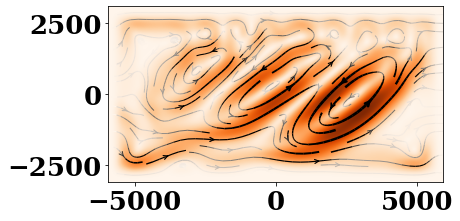

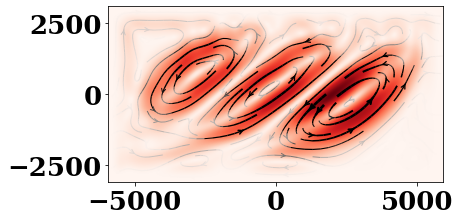

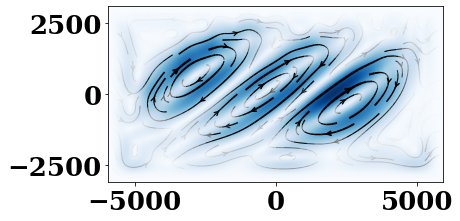

In [11]:
for current, colormap, name in zip(all_currents, ["Oranges", "Reds", "Blues"],["total","up","down"]):
        fig, axis = plt.subplots()
        kwant.plotter.current(syst, current, cmap = colormap, colorbar = False, show = False, ax=axis)
#         tools.edit_axis(axis,'total')
#         axis.set_title(r"$\varepsilon = $ "+str(Fermi_energy)+" meV", fontsize=tools.FONT_TITLES)
        plt.show()
#         plt.savefig("../../"+name+"_current_"+str(Fermi_energy)+"L_600.png")

In [ ]:
fig, axis = plt.subplots()
kwant.plotter.current(syst, current, cmap = colormap, colorbar = False, show = False, ax=axis)
        tools.edit_axis(axis,'total')
        axis.set_title(r"$\varepsilon = $ "+str(Fermi_energy)+" meV", fontsize=tools.FONT_TITLES)
        plt.savefig("../../"+name+"_current_"+str(Fermi_energy)+"L_600.png")